<a href="https://colab.research.google.com/github/YYK31/Bank-Marketing-Effectiveness/blob/main/Bank_Marketing_Effectiveness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Bank Marketing Effectiveness Prediction**     



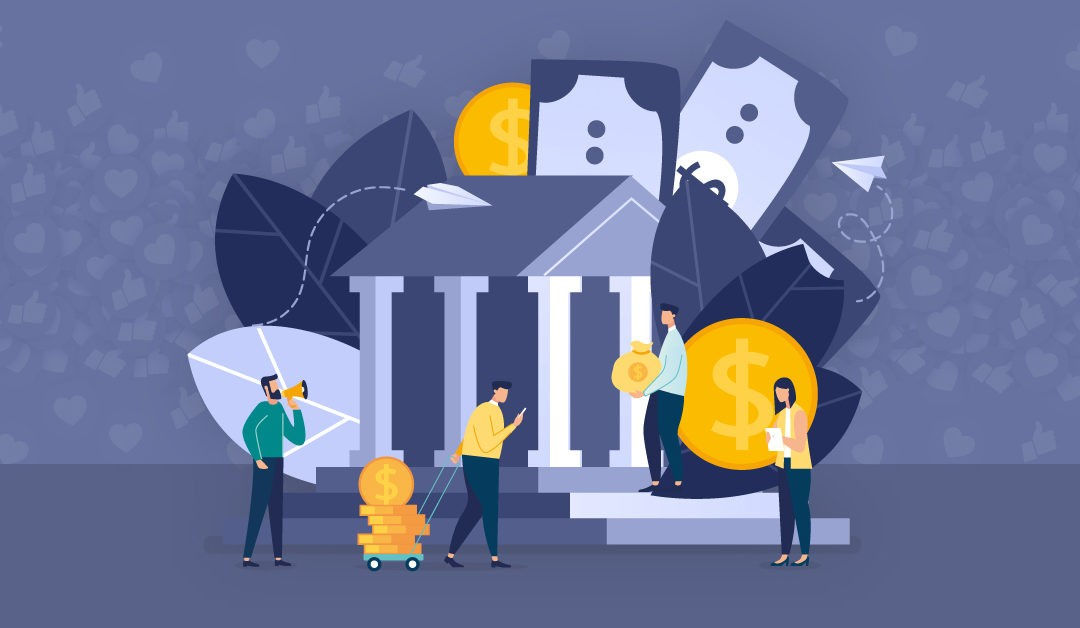

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -**    YASH KAMBLE

# **GitHub Link -**

# **Project Summary -**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

#### **Business Objective** 

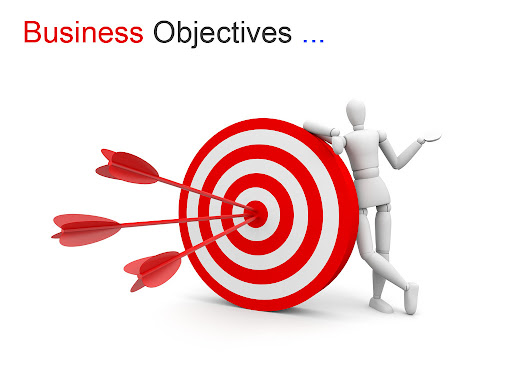

The business objective for this project is to predict if a client will subscribe to a term deposit (variable y) based on the input variables provided, such as the client's demographics, job, and financial status, as well as information related to previous marketing campaigns. The goal is to improve the effectiveness of future direct marketing campaigns by identifying which clients are more likely to subscribe to a term deposit.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing all the required libraries for the data exploration
#-----------------------------------------------------------------
# import Numpy. It consists of Single dimentional array & Multi-dimensional array object.
import numpy as np
# import Pandas. It consists of single and multi- dimensional data struture for data manipulation. 
import pandas as pd
# import matplotlib. Matplotlib is a python libraray used for data visualization 
from matplotlib import pyplot as plt
%matplotlib inline
# import seaborn . Seaborn is a python libraray used for data visualization
import seaborn as sns
# ignore warnings
import warnings    
warnings.filterwarnings('ignore')

# Modules for dataframe and ndarrays and maths
import pandas as pd
import numpy as np
from datetime import datetime
import math
from scipy.stats import *


# visualisation packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(15,6),'figure.dpi':70})

### Dataset Loading

In [2]:
# Give Google Access to Your Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Declare the path of mydrive
path='/content/drive/MyDrive/'

In [4]:
# loading an Bank-Marketing-Effectiveness dataset
bank_full=pd.read_csv("/content/drive/MyDrive/aba/bank-full.csv",sep=';')

### Dataset First View

In [ ]:
# having a glance of top 5 record of the Bank-Marketing-Effectiveness dataset
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# having a glance of last 5 record of the Bank-Marketing-Effectiveness dataset
bank_full.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


### Dataset Rows & Columns count

In [ ]:
# Looking at the number of rows and coloums in the Bank-Marketing-Effectiveness dataset
bank_full.shape

(45211, 17)

### Dataset Information

In [ ]:
# getting information of Bank-Marketing-Effectiveness data
bank_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Duplicate Values

In [ ]:
# cheaking the duplicates values in Bank-Marketing-Effectiveness dataset
bank_full.duplicated().sum()

0

### What did you know about your dataset?

 Following observation are obtain for our bank dataset :


*   Our dataset have 45211 records and 17 columns.
*   Our datasethave 10 categorical features with object dtype and 7 continuous features with int and float dtypes.






## ***2. Understanding Your Variables***

###Statistics

In [ ]:
# Dataset Columns
bank_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# get statistics information of data
bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Variables Description 



*   age:It represents the age of the customers
*   balance:It depicts the account balance.

*   duration:It depicts the time duration for which the customer was last contacted.
*   day:It depicts the day of the month

*   campaign:It shows how many times each prospective consumer was contacted as part of the current campaign.
*   pdays:It shows the number of days passed by after the client was contacted from a previous campaign.

*   previous:It is the number of contacts performed before this campaign  
*   jobs:This feature shows the type of jobs.
*   marital:This column shows the marital status of the customers

*   education:This column shows the educational qualification of the customers
*   Default: This column shows weather the customer has ctedit in default or 

*   housing:This columns shows wheater customer has a housing loan or not.
*   loan:This columns shows wheater customer has opted for any kind of loan or not.

*   contact:This column shows the communication between customers and the bank.
*   month:This column shows the month in which the customers were last contanted.

*   poutcome:This columns suggests the outcome the last campaign.
*   y:This is the target variable which suggests that wheater the customer went for term deposit or not















### Check Unique Values for each variable.

In [ ]:
# creating a list of categorical and numerical features
num_list = ['age', 'balance', 'day', 'duration', 'campaign', 'previous']
cat_list = [ 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

In [ ]:
# Check the Unique Values for categorical variable.
print("Unique values of Categorical columns: \n")
for i in cat_list:
  print(f'Unique values of {i} column ======= {bank_full[i].unique()}')

Unique values of Categorical columns: 

Unique values of job column ======= ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values of marital column ======= ['married' 'single' 'divorced']
Unique values of education column ======= ['tertiary' 'secondary' 'unknown' 'primary']
Unique values of default column ======= ['no' 'yes']
Unique values of housing column ======= ['yes' 'no']
Unique values of loan column ======= ['no' 'yes']
Unique values of contact column ======= ['unknown' 'cellular' 'telephone']
Unique values of month column ======= ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values of poutcome column ======= ['unknown' 'failure' 'other' 'success']
Unique values of y column ======= ['no' 'yes']


In [ ]:
# Check the Unique Values for numerical variable.
print("Unique values of Numerical columns: \n")
for i in num_list:
  print(f'Unique values of {i} column ======= {bank_full[i].unique()}')

Unique values of Numerical columns: 

Unique values of age column ======= [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
Unique values of balance column ======= [ 2143    29     2 ...  8205 14204 16353]
Unique values of day column ======= [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Unique values of duration column ======= [ 261  151   76 ... 1298 1246 1556]
Unique values of campaign column ======= [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
Unique values of previous column ======= [  0   3   1   4   2  11  16   6   5  10  12   7  18   9  21   8  14  15
  26  37  13  25  20  27  17  23  38  29  24  51 275  22  19  30  58  28
  32  40  55  35  41]


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


*   In our dataset some columns contained Unknown values which need to be treated, we replaced it with np.nan and then counted it.
*   We focus on Education,Contact,poutcome coloums because it's contain null values.


In [ ]:
# Replacing Unknown entry in the dataset across the columns with np.nan
bank_full = bank_full.replace('unknown', np.nan)

In [ ]:
#Checking Null Values
bank_full_df= pd.DataFrame({"Total Values": bank_full.shape[0] , "Total Null values": bank_full.isnull().sum(),"%a of Null values" : round((bank_full.isnull().sum()/ bank_full.shape[0])*100 , 2) })
bank_full_df.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
poutcome,45211,36959,81.75
contact,45211,13020,28.80
education,45211,1857,4.11
job,45211,288,0.64
month,45211,0,0.00
previous,45211,0,0.00
pdays,45211,0,0.00
campaign,45211,0,0.00
duration,45211,0,0.00
age,45211,0,0.00


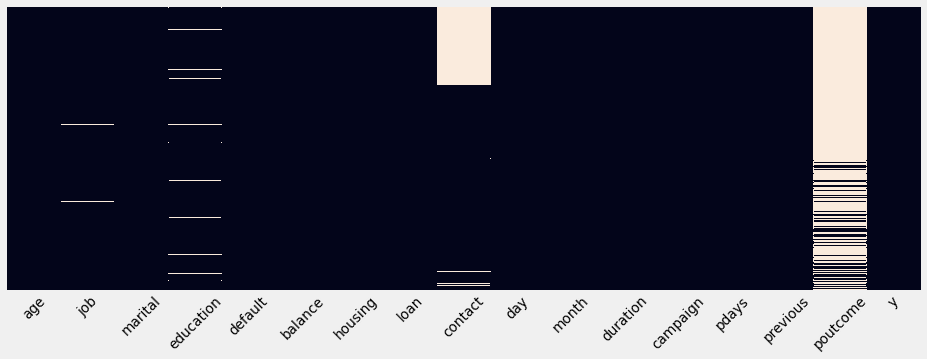

In [ ]:
# visualization of null values 
plt.figure(figsize=(15,5))
sns.heatmap(bank_full.isnull(), cbar=False, yticklabels=False, cmap='rocket')
# Rotate the x-axis tick labels
plt.xticks(rotation=45)
plt.show()

In [ ]:
# replace all null values of job , education , contact with mode in respective columns
null_df = ['job','education','contact']
for i in null_df:
  bank_full[i].fillna(bank_full[i].mode()[0],inplace=True)

In [ ]:
# replacing null or unknown values with the category 'other' 
bank_full['poutcome'].fillna('other',inplace=True)

In [ ]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,other,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,other,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,other,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,other,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,other,no


### What all manipulations have you done and insights you found?



1. **Job**: In the job column there are 288 nan values in this column. So we substituted with the mode i.e. "Blue Collar jobs".
2. **Education**: In the Education column 1857 nan values in this column, we substituted it  with the mode i.e. "Secondary Education".
3. **Contact**: Since there are 13,020 nan values in this column .So we substituted the mode i.e. 'Cellular'.
4. **poutcome**: It contained 3 fields that is 'success', 'failure' and 'others'.So Here we Predict that the unknown data points will fall under 'other' category, that's why we filled with 'other'.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1- Target Variable(Univariate)

In [ ]:
# value_counts of job
bank_full.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

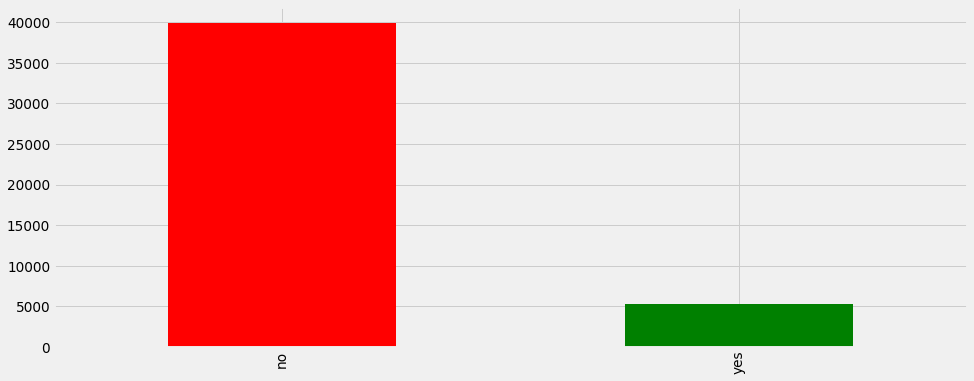

In [ ]:
bank_full.y.value_counts().plot.bar(color=['r','g'])
plt.show()

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

To show the dependant variable total counts, I have used Bar Chart.

After creating visualization ,I found that Lot's of clients are not subscribed the term deposit.

#### Chart - 2 - Density Distrubution of Numerical columns(Multivariate)

In [ ]:
!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 7.2 MB/s eta 0:00:00
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import klib

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


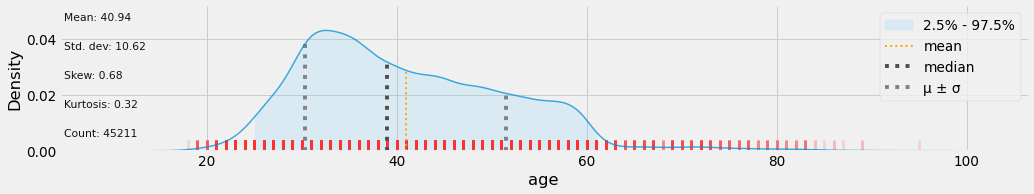

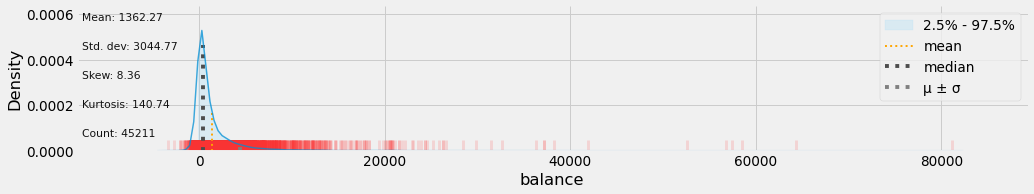

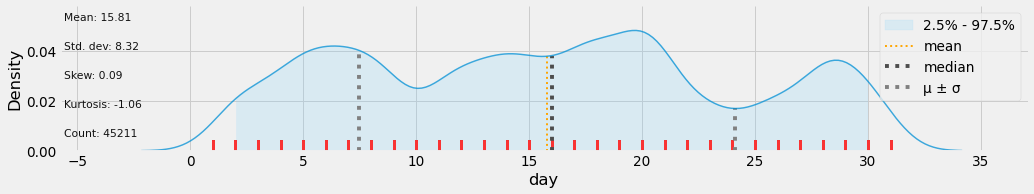

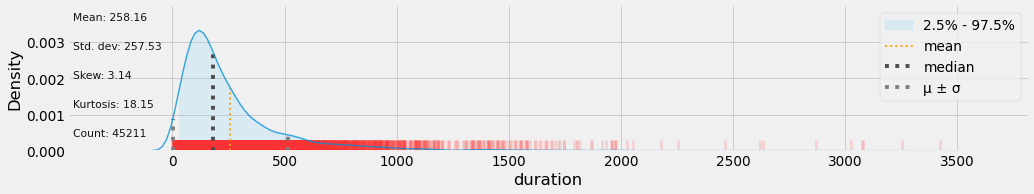

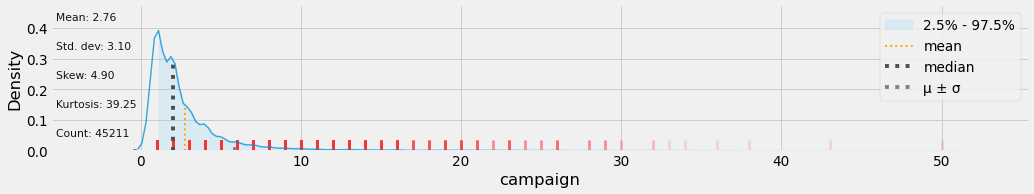

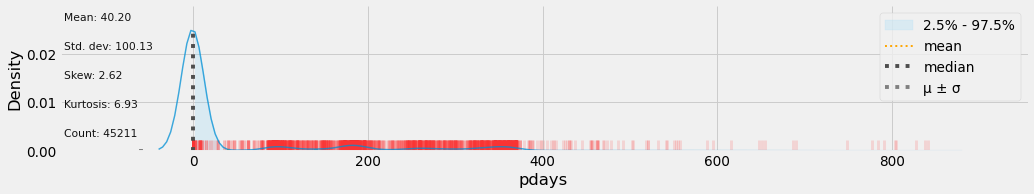

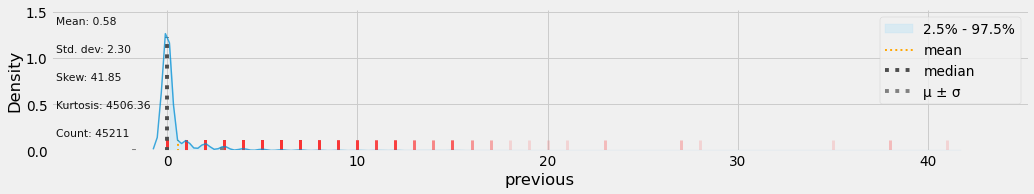

In [ ]:
klib.dist_plot(bank_full)

Density Distribution & Stastastical Representaion Of Numerical Columns.

### Univariate Analysis

#### Chart - 3 - Barplot- Age(Numerical)

In [ ]:
# value_counts of age
bank_full.age.value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

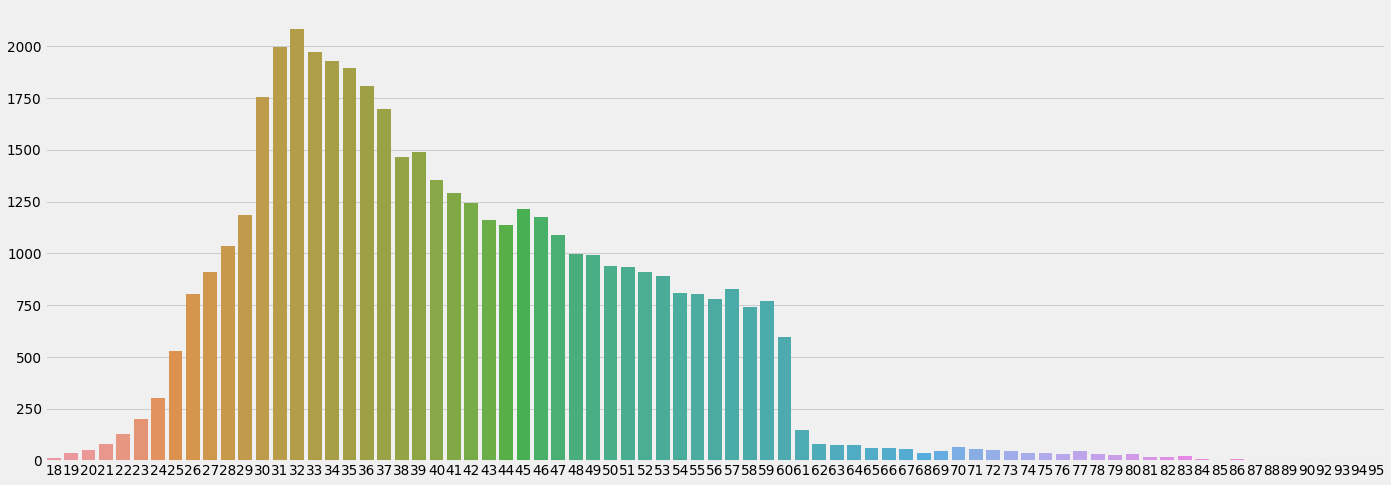

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(22,8))
#Barplot
sns.barplot(y=bank_full['age'].value_counts().values,x=bank_full['age'].value_counts().index) 
plt.show()

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

To show the Age total counts, I have used Bar Chart.

After creating visualization ,I found that Lot's of clients age are between 30 to 45.

#### Chart - 4- Job(Categorical)

In [ ]:
# value_counts of job
bank_full.job.value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

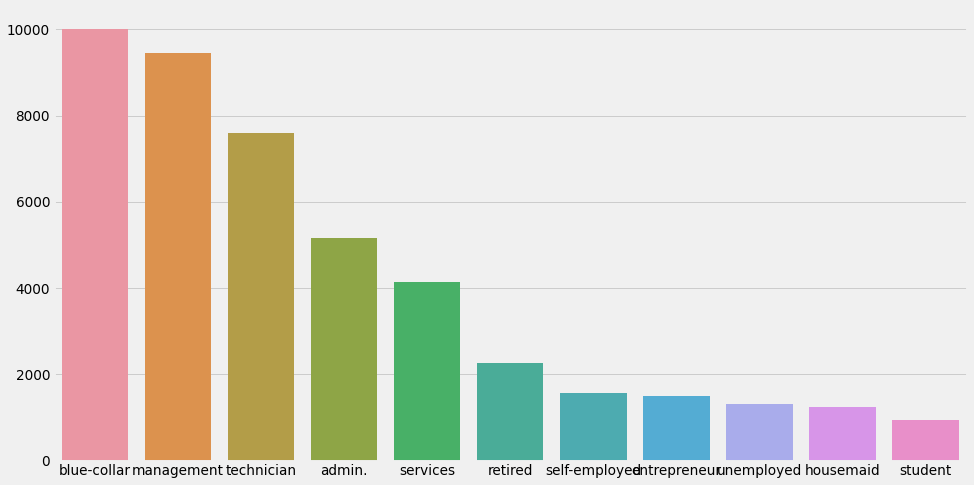

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(15,8))
#Barplot
sns.barplot(y=bank_full['job'].value_counts().values,x=bank_full['job'].value_counts().index) 
plt.show()

Bar charts are simple and easy to read, making them a good choice for communicating data to a wide audience.They make it easy to identify the largest and smallest values, as well as relative differences between values.

To show the job's total counts, I have used Bar Chart.

After creating visualization ,I found Most of clients job background are blue-collar, management &  techniian.


#### Chart - 5 - Marital(Categorical)

In [ ]:
# value_counts of job
bank_full.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

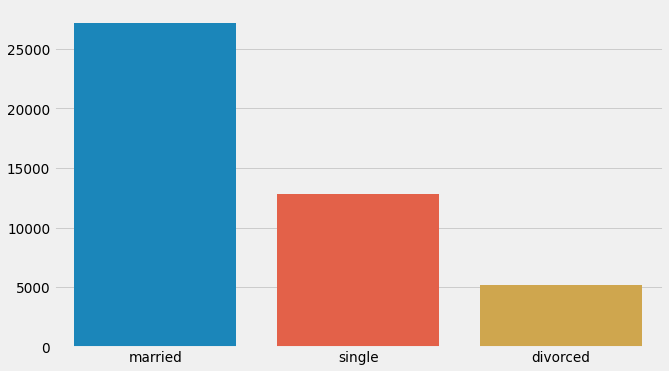

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(10,6))
#Barplot
sns.barplot(y=bank_full['marital'].value_counts().values,x=bank_full['marital'].value_counts().index) 
plt.show()

Bar charts are a versatile data visualization tool that can be used to effectively communicate and compare data, highlight patterns and make data more accessible to a wide audience.

To show the marital total counts, I have used Bar Chart.

After creating visualization ,I found count of married clients are very high as compared to single & divorced that means our lot's of clients are married

#### Chart - 6 - Education(Categorical)

In [ ]:
# value_counts of job
bank_full.education.value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

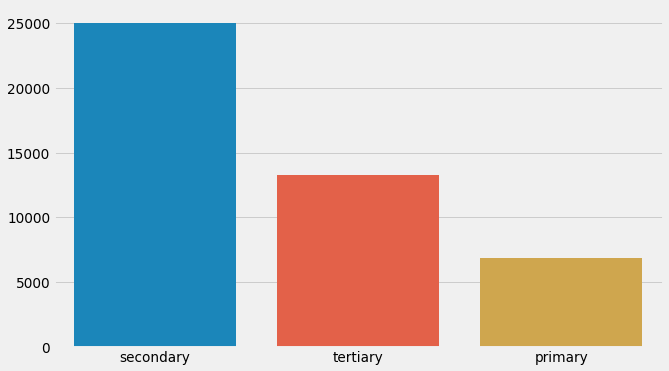

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(10,6))
#Barplot
sns.barplot(y=bank_full['education'].value_counts().values,x=bank_full['education'].value_counts().index) 
plt.show()

Bar charts are useful in highlighting patterns in data, such as trends, changes over time, and differences between groups.


To show the education total counts, I have used Bar Chart.

After creating visualization ,I found that secondary education of clients are so high as compared to tertiary & primary.

#### Chart - 7- Default(Categorical)

In [ ]:
# value_counts of default
bank_full.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

Text(0.5, 1.0, 'default_Percentage')

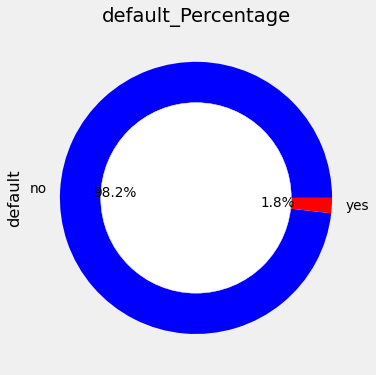

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(10,6))
bank_full['default'].value_counts().plot(kind='pie',autopct="%1.1f%%",colors=['blue','red'])
circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('default_Percentage') 

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors.


To show the credit default total counts, I have used Pie Chart.

After creating visualization ,I found that there are 98% (no) defaluters and just 1.8% of (yes) defaulters

#### Chart - 8- Housing Loan(Categorical)

In [ ]:
# value_counts of housing
bank_full.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

Text(0.5, 1.0, 'housing_Percentage')

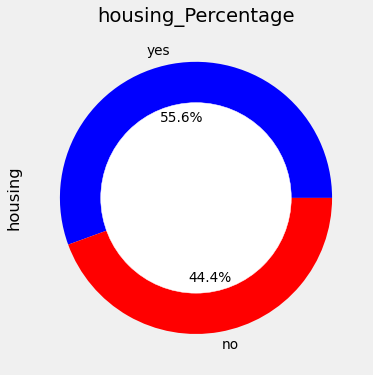

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(10,6))
bank_full['housing'].value_counts().plot(kind='pie',autopct="%1.1f%%",colors=['blue','red'])
circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('housing_Percentage') 

Pie charts are simple and easy to understand, making them a good choice for displaying data to a wide audience. Pie charts allow you to compare the relative sizes of different categories of data, making it easy to identify patterns and trends.


To show the housing loan total counts, I have used Pie Chart.

After creating visualization ,I found that 55.6% clients taken housing loan & 44.4% clients are not

#### Chart - 9- Personal Loan (Categorical)

In [ ]:
# value_counts of loan
bank_full.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

Text(0.5, 1.0, 'loan_Percentage')

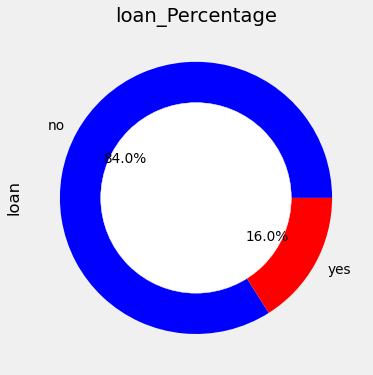

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(10,6))
bank_full['loan'].value_counts().plot(kind='pie',autopct="%1.1f%%",colors=['blue','red'])
circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('loan_Percentage') 

Pie charts are simple and easy to understand, making them a good choice for displaying data to a wide audience. Pie charts allow you to compare the relative sizes of different categories of data, making it easy to identify patterns and trends.


To show the Personal loan total counts, I have used Pie Chart.

After creating visualization ,I found that only 16% clients taken personal loan & 84% clients are not. (Opposite of housing loan)

#### Chart - 10- Contact (Categorical)

In [ ]:
# value_counts of contact
bank_full.contact.value_counts()

cellular     42305
telephone     2906
Name: contact, dtype: int64

Text(0.5, 1.0, 'contact_Percentage')

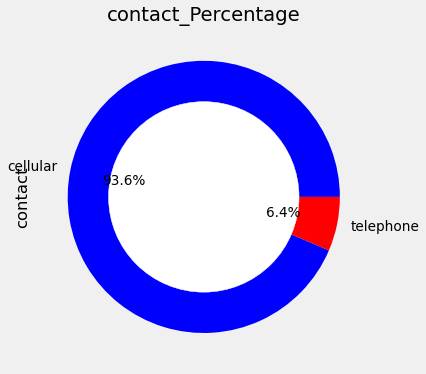

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(10,6))
bank_full['contact'].value_counts().plot(kind='pie',autopct="%1.1f%%",colors=['blue','red'])
circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('contact_Percentage') 

Pie charts are simple and easy to understand, making them a good choice for displaying data to a wide audience. Pie charts allow you to compare the relative sizes of different categories of data, making it easy to identify patterns and trends.


To show the communication contact total counts, I have used Pie Chart.

After creating visualization ,I found that 93.6% clients are familiar with cellular communication contact & 6.4% clients are familiar with telephone communication contact. 

#### Chart - 11- Day (Numerical)

In [ ]:
# value_counts of contact
bank_full.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

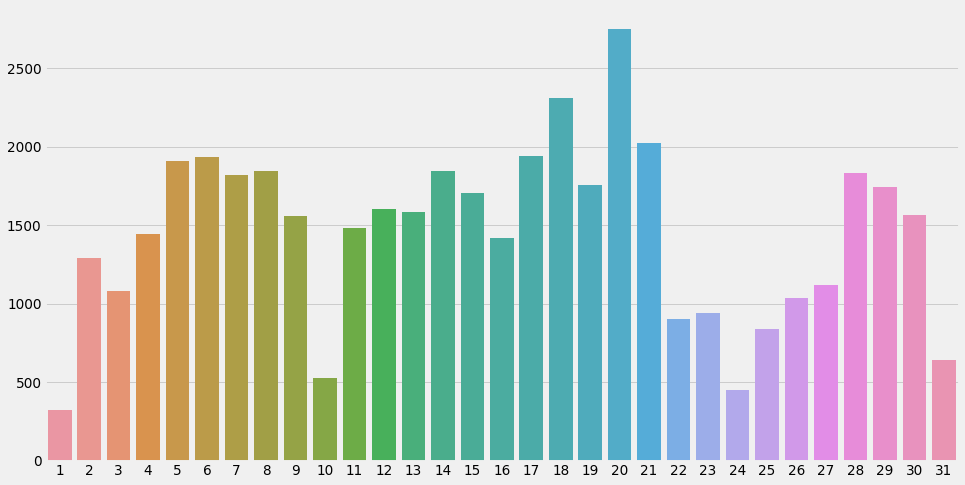

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(15,8))
#Barplot
sns.barplot(y=bank_full['day'].value_counts().values,x=bank_full['day'].value_counts().index) 
plt.show()

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

To show the count of day , I have used Bar Chart.

After creating visualization ,I found that  freq of day's

#### Chart - 12- Month (Categorical)

In [ ]:
# value_counts of month
bank_full.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

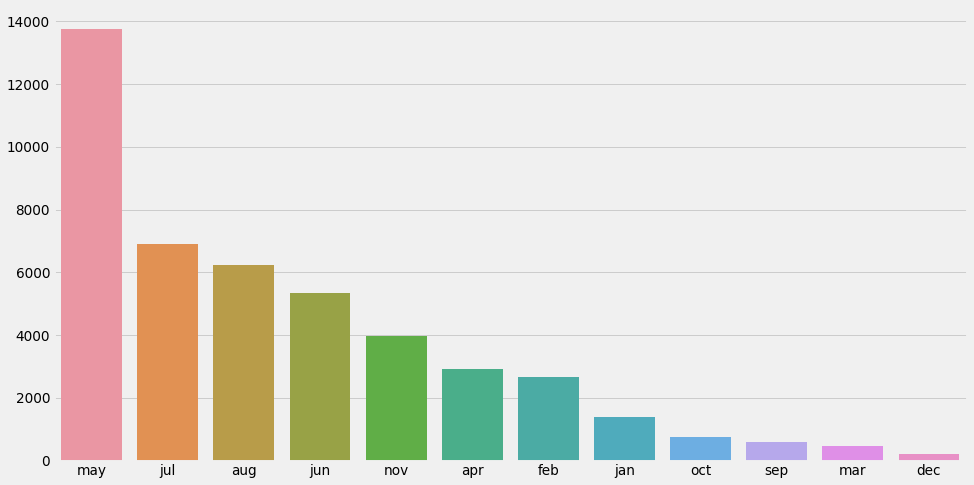

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(15,8))
#Barplot
sns.barplot(y=bank_full['month'].value_counts().values,x=bank_full['month'].value_counts().index) 
plt.show()

Bar charts are a versatile data visualization tool that can be used to effectively communicate and compare data, highlight patterns and make data more accessible to a wide audience.


To show the number_of mmonths , I have used bar Chart.

After creating visualization ,I found that count of May month is very high as compared to others


#### Chart - 13- campaign (Numerical)

In [ ]:
# value_counts of campaign
bank_full.campaign.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

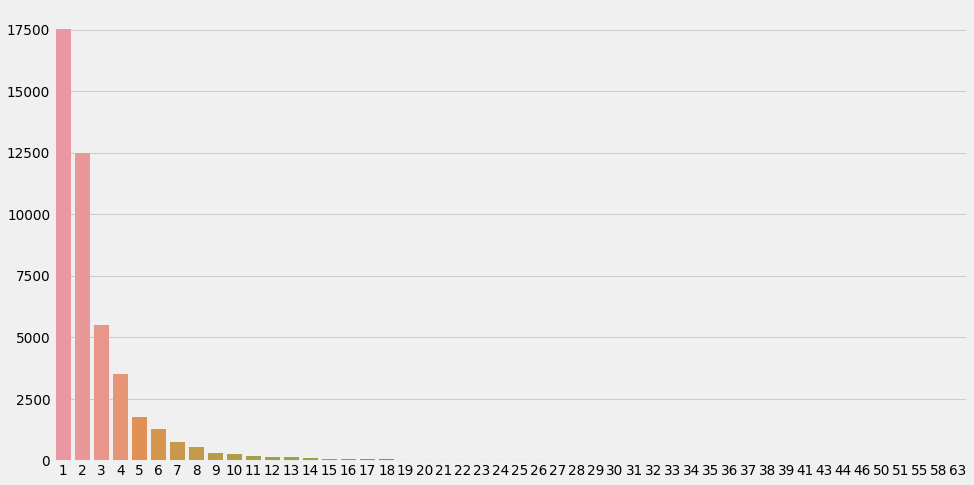

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(15,8))
#Barplot
sns.barplot(y=bank_full['campaign'].value_counts().values,x=bank_full['campaign'].value_counts().index) 
plt.show()

Bar charts are a versatile data visualization tool that can be used to effectively communicate and compare data, highlight patterns and make data more accessible to a wide audience.


To show the count of campaign , I have used bar Chart.

It shows the number of contacts performed during this campaign 

#### Chart - 14- Previous (Numerical)

In [ ]:
# value_counts of previous
bank_full.previous.value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

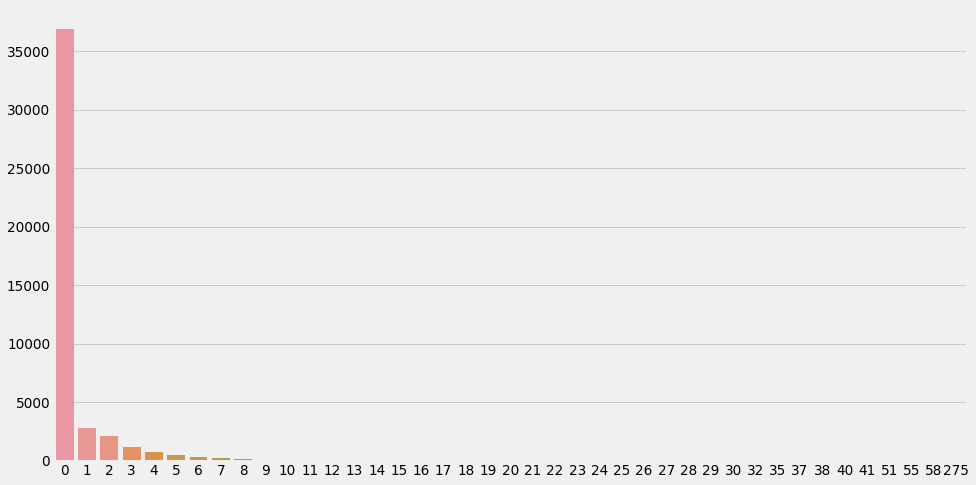

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(15,8))
#Barplot
sns.barplot(y=bank_full['previous'].value_counts().values,x=bank_full['previous'].value_counts().index) 
plt.show()

Bar charts are a versatile data visualization tool that can be used to effectively communicate and compare data, highlight patterns and make data more accessible to a wide audience.


To show the count of previous , I have used bar Chart.

It shows the number of contacts performed Before this campaign 

#### Chart - 15- Poutcome (Categorical)

In [ ]:
# value_counts of poutcome
bank_full.poutcome.value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

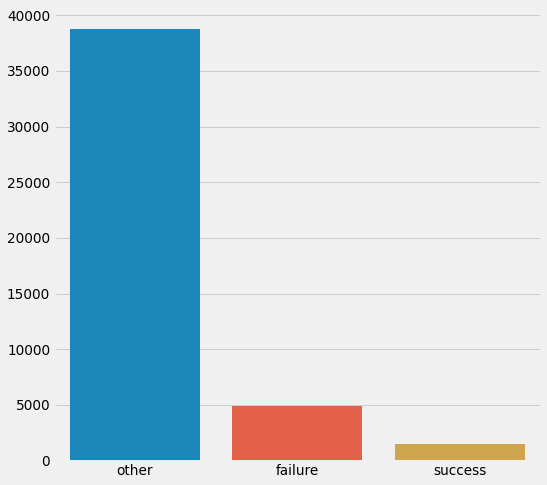

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(8,8))
#Barplot
sns.barplot(y=bank_full['poutcome'].value_counts().values,x=bank_full['poutcome'].value_counts().index) 
plt.show()

Bar charts are a versatile data visualization tool that can be used to effectively communicate and compare data, highlight patterns and make data more accessible to a wide audience.


To show the count of Output , I have used bar Chart.

It shows the outcome of the previous marketing campaign.After creating this visualization i found that other categorys clients outcome are to high.

### Bivariate Analyasis

#### Chart - 16 - job VS y(Dependant Variable)

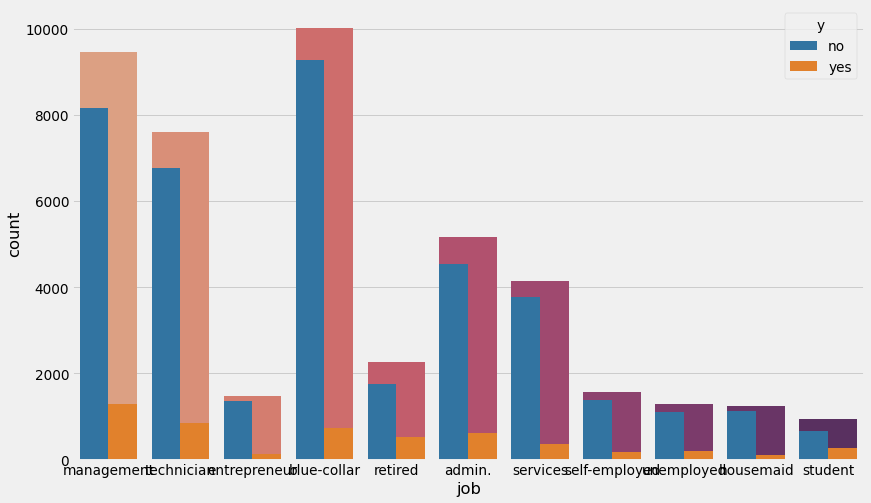

In [ ]:
fig, ax=plt.subplots(figsize=(13,8))
sns.countplot(bank_full.job,ax=ax,palette='flare')
sns.countplot(bank_full.job,hue=bank_full.y,ax=ax,palette='tab10')
plt.show()

Bar charts are useful in highlighting patterns in data, such as trends, changes over time, and differences between groups.

After creating visualization ,I found that Customers with Blue-collar, management and technician showed maximum interest in subscription. We can also observe the large variance in our data among all categories.

#### Chart - 17 - Marital VS y(Dependant Variable)

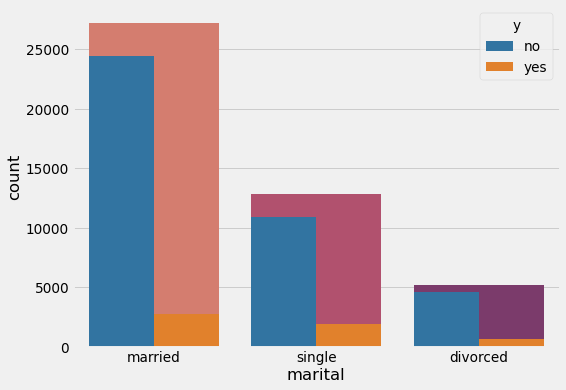

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(bank_full.marital,ax=ax,palette='flare')
sns.countplot(bank_full.marital,hue=bank_full.y,ax=ax,palette='tab10')
plt.show()

Bar charts are useful in highlighting patterns in data, such as trends, changes over time, and differences between groups.

After creating visualization ,I found that Married and single showed more interest in term deposit

#### Chart - 18 - Education VS y(Dependant Variable)

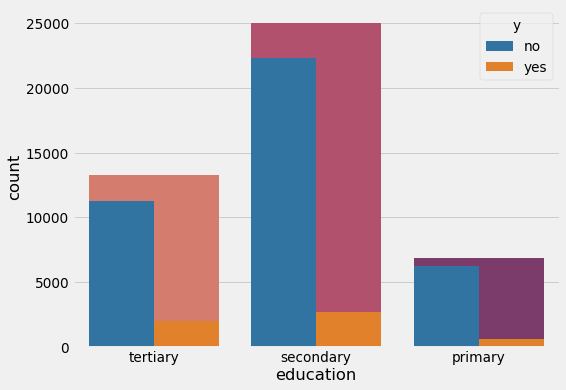

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(bank_full.education,ax=ax,palette='flare')
sns.countplot(bank_full.education,hue=bank_full.y,ax=ax,palette='tab10')
plt.show()

Bar charts are useful in highlighting patterns in data, such as trends, changes over time, and differences between groups.

After creating visualization ,I found that In comparison to primary education, people with secondary and tertiary education were more driven towards paying term deposit in bank.

#### Chart - 19 - Default VS y(Dependant Variable)

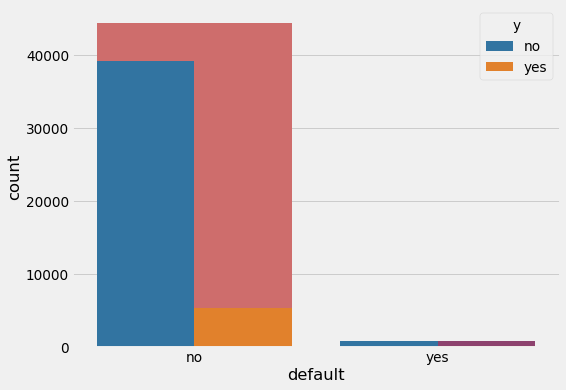

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(bank_full.default,ax=ax,palette='flare')
sns.countplot(bank_full.default,hue=bank_full.y,ax=ax,palette='tab10')
plt.show()

Bar charts are useful in highlighting patterns in data, such as trends, changes over time, and differences between groups.

After creating visualization ,I found that  Majority of people don't have credit in default.

#### Chart - 20 - Housing Loan VS y(Dependant Variable)

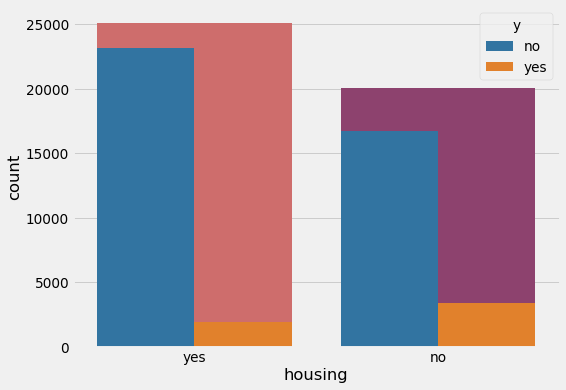

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(bank_full.housing,ax=ax,palette='flare')
sns.countplot(bank_full.housing,hue=bank_full.y,ax=ax,palette='tab10')
plt.show()

Bar charts are useful in highlighting patterns in data, such as trends, changes over time, and differences between groups.

After creating visualization ,I found that  Majority of the clients had previous housing loans and thus very few of them opted for term deposit.

#### Chart - 21 - Personal Loan VS y(Dependant Variable)

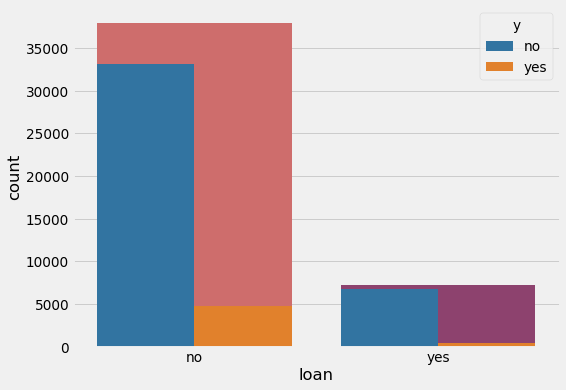

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(bank_full.loan,ax=ax,palette='flare')
sns.countplot(bank_full.loan,hue=bank_full.y,ax=ax,palette='tab10')
plt.show()

Bar charts are useful in highlighting patterns in data, such as trends, changes over time, and differences between groups.


After creating visualization ,I found that Majority of the clients had personal loans and thus very few of them opted for term deposit.

#### Chart - 22 - Contact VS y(Dependant Variable)

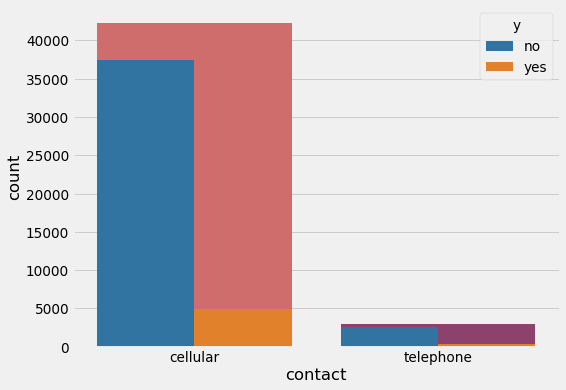

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(bank_full.contact,ax=ax,palette='flare')
sns.countplot(bank_full.contact,hue=bank_full.y,ax=ax,palette='tab10')
plt.show()

Bar charts are useful in highlighting patterns in data, such as trends, changes over time, and differences between groups.


After creating visualization ,I found that majority of the clients were contacted through cellular medium and were converted to the subscription. Thus, cellular medium of contact is more effective in comparison to telephone and other mediums.

#### Chart - 23 - Day VS y(Dependant Variable)

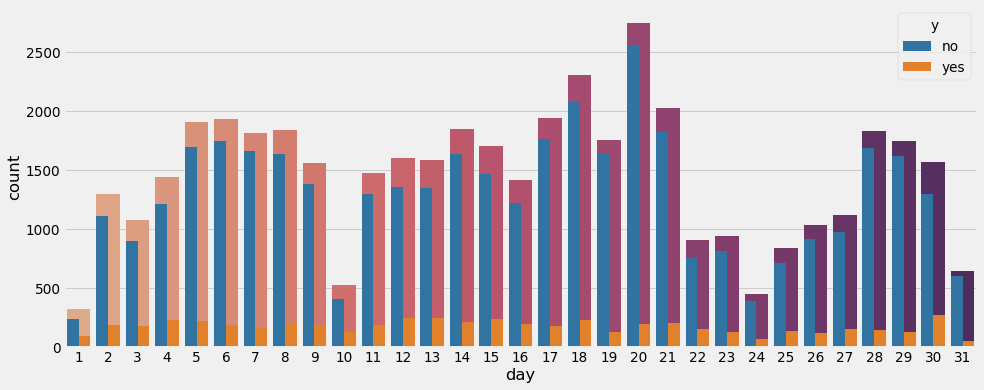

In [ ]:
fig, ax=plt.subplots(figsize=(15,6))
sns.countplot(bank_full.day,ax=ax,palette='flare')
sns.countplot(bank_full.day,hue=bank_full.y,ax=ax,palette='tab10')
plt.show()

Bar charts are useful in highlighting patterns in data, such as trends, changes over time, and differences between groups.


After creating visualization ,I found that we can predict that on first, tenth and near to the end of the month people took the term deposit.

#### Chart - 24 - Month VS y(Dependant Variable)

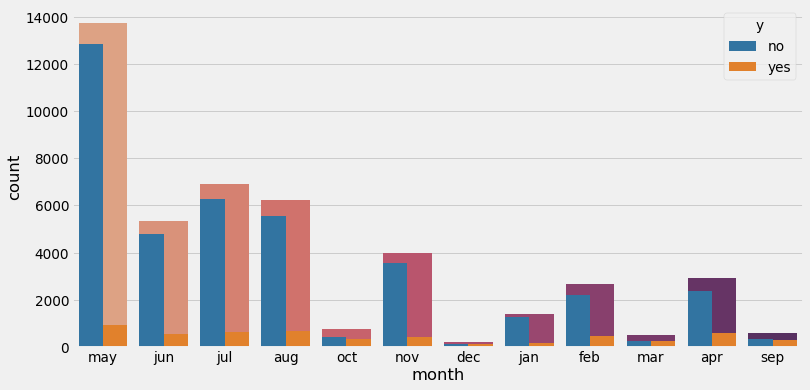

In [ ]:
fig, ax=plt.subplots(figsize=(12,6))
sns.countplot(bank_full.month,ax=ax,palette='flare')
sns.countplot(bank_full.month,hue=bank_full.y,ax=ax,palette='tab10')
plt.show()

Bar charts are useful in highlighting patterns in data, such as trends, changes over time, and differences between groups.


After creating visualization ,I found that During the month of may there were maximum subscriptions with relatively good subscriptions in june, july and august. During other months we can se less subscription and so we can combine few of them ater on.

#### Chart - 25 - Poutcome VS y(Dependant Variable)

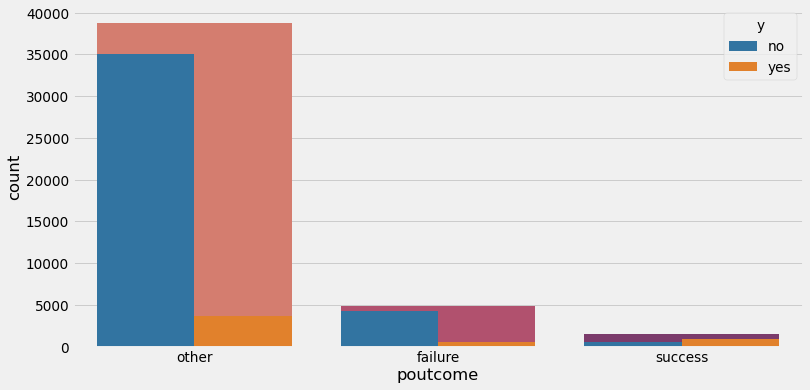

In [ ]:
fig, ax=plt.subplots(figsize=(12,6))
sns.countplot(bank_full.poutcome,ax=ax,palette='flare')
sns.countplot(bank_full.poutcome,hue=bank_full.y,ax=ax,palette='tab10')
plt.show()

Bar charts are useful in highlighting patterns in data, such as trends, changes over time, and differences between groups.


After creating visualization , Looking at poutcome we can infer that the success rate was high for other category.

### Multivariate Analysis

#### Chart - 25 - Campaign VS Duration With y(Dependant Variable)

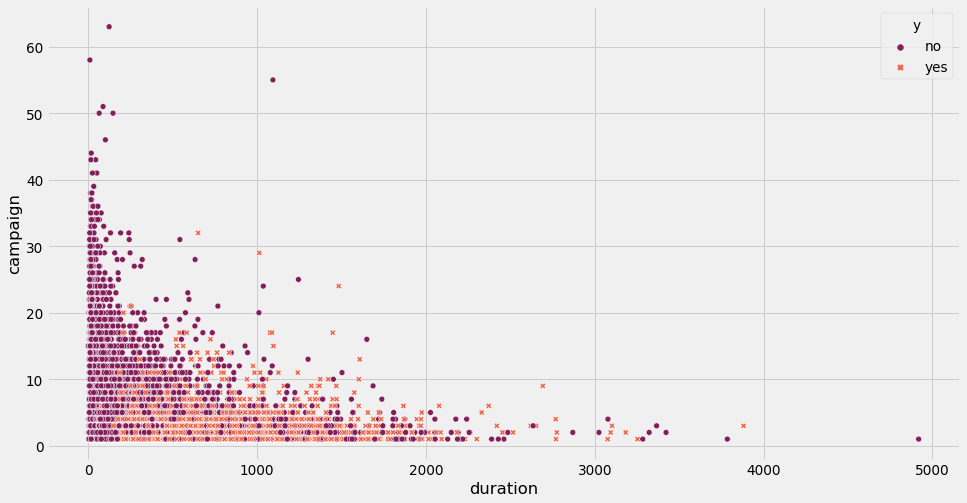

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(15,8))
sns.scatterplot(x='duration',y='campaign',data=bank_full,hue='y',style="y",palette="rocket")
plt.show()

Scatter plots are useful for visualizing the relationship between two variables. They can help to identify patterns and trends, such as correlation and outliers. Scatter plots can also be used to compare multiple data sets, and can be useful for identifying non-linear relationships

After creating visualization ,I found that the success rate is more for less number of contacts in this campaign.

#### Chart - 26 - Balance VS Duration With y(Dependant Variable)

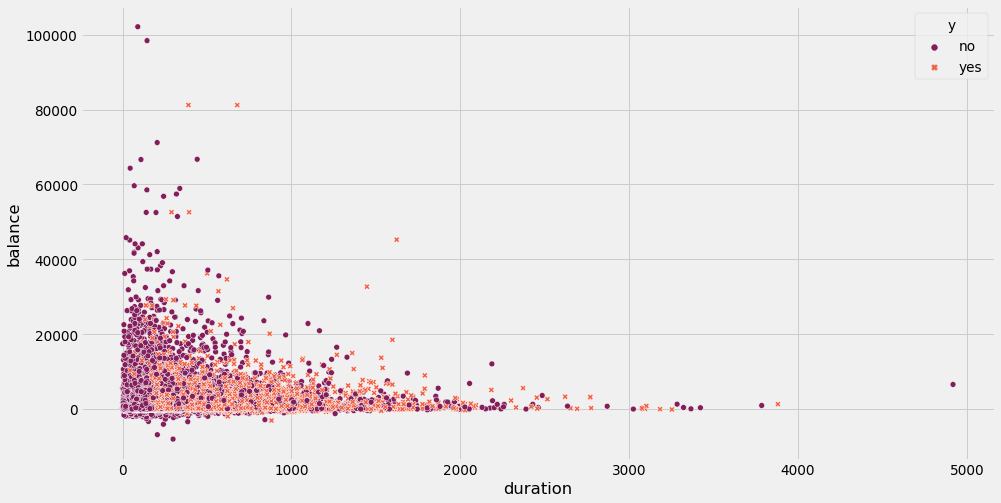

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(15,8))
sns.scatterplot(x='duration',y='balance',data=bank_full,hue='y',style="y",palette="rocket")
plt.show()

Scatter plots are useful for visualizing the relationship between two variables. They can help to identify patterns and trends, such as correlation and outliers. Scatter plots can also be used to compare multiple data sets, and can be useful for identifying non-linear relationships

After creating visualization ,I found that Most of the clients who have taken a term deposit do not have very high balance(mostly in between 0-20000)

#### Chart - 27 - Heatmap

In [ ]:
#storing airbnb.corr() in new cor variable
cor=bank_full.corr()
cor

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


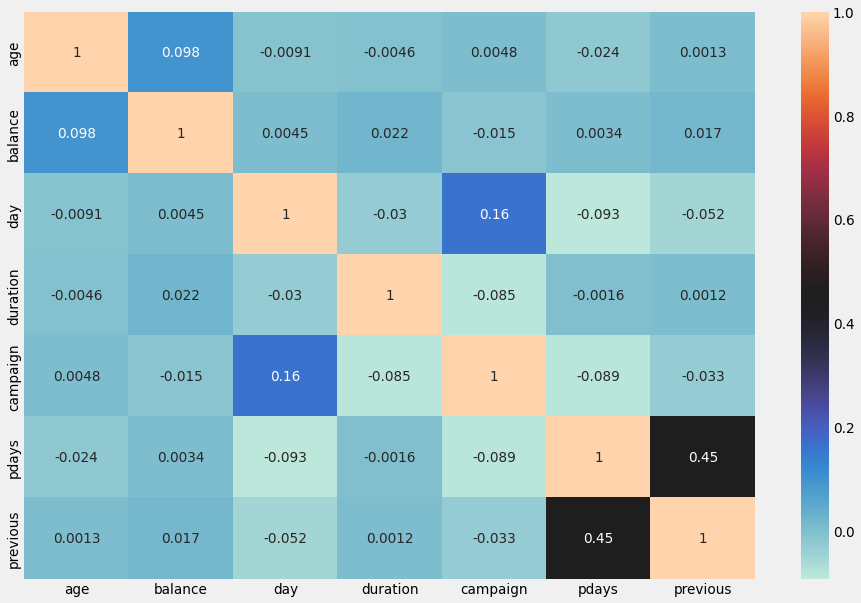

In [ ]:
#figure size
plt.figure(figsize=(15,10))
#heatmap for corrletion
sns.heatmap(data=cor,annot= True,cmap='icefire')

 Heatmaps are effective in comparing multiple variables at once. They make it easy to identify patterns and relationships between variables, such as how two variables change together.  heatmaps are a powerful data visualization tool that can be used to effectively identify patterns



#### Chart - 28 - Pairplot

<Figure size 1050x560 with 0 Axes>

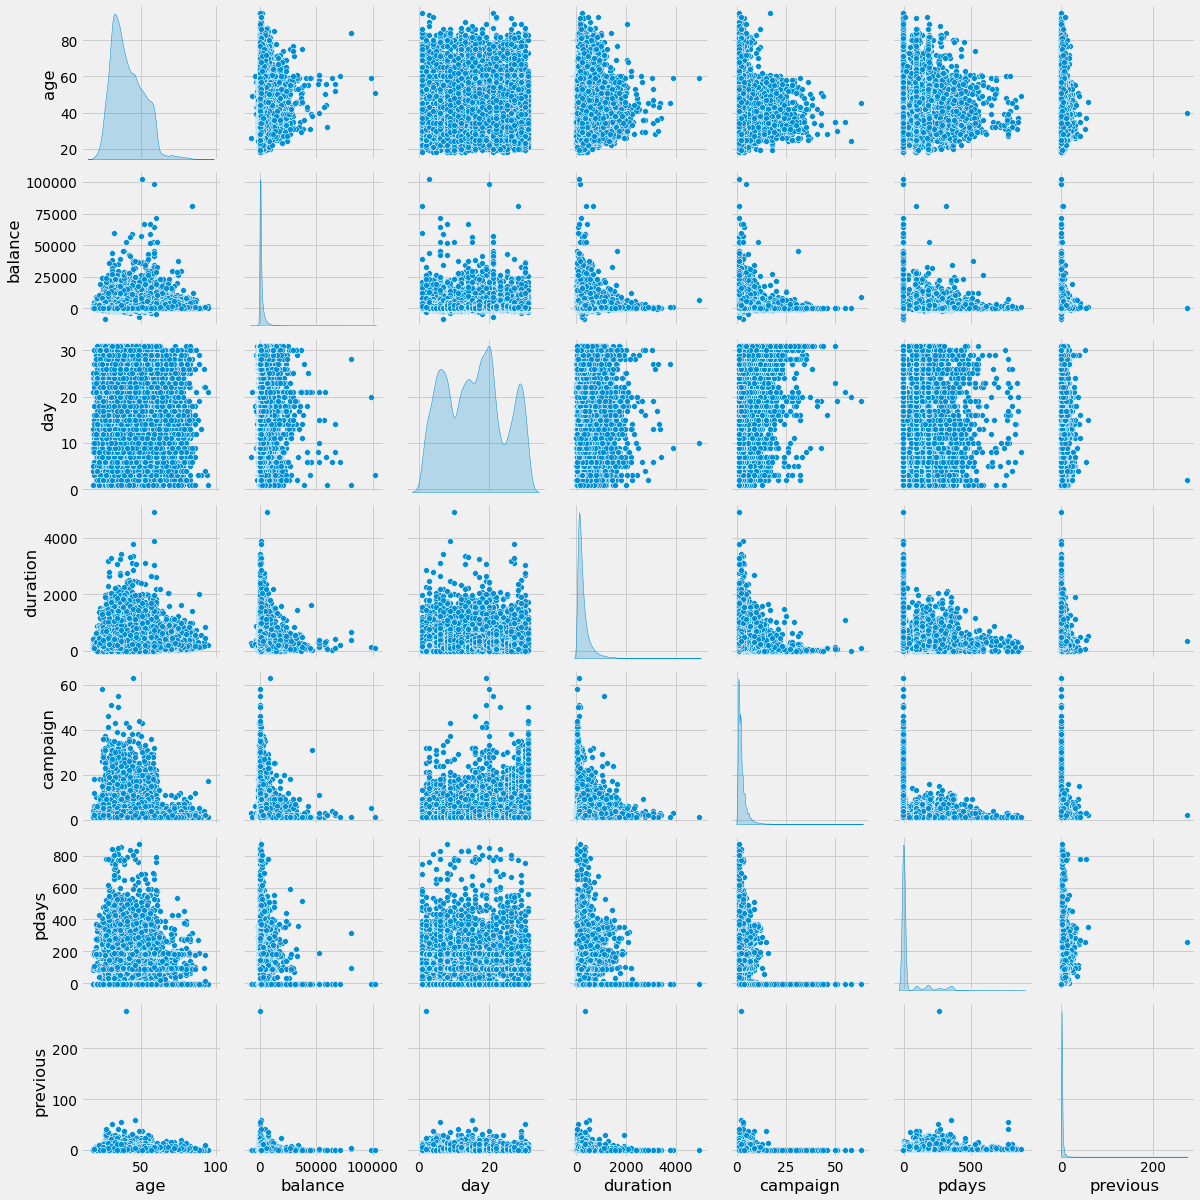

In [ ]:
#figure size
plt.figure(figsize=(15,8))
#pairplot
pairplot=sns.pairplot(bank_full,diag_kind='kde')

Pairplots can be used to quickly explore the relationship between multiple variables in a dataset. They make it easy to identify patterns and relationships between variables, such as how two variables change together. They can help identify patterns, correlations, and outliers in the data, and can be useful in identifying the most important variables that contribute to variations in the data.

Here we can see that the balance and duration has negative correlation that indicates that the customers who are rich are spending less time on a call.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [ ]:
import math
#helper functions 
class statistic:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [ ]:

#calculating variance
variance_df = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)

In [ ]:

#creating instance of the class
statistic_df = statistic()

In [ ]:
#creating a function 
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Null Hypothesis rejected fail for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

In [ ]:
zcdf_df = lambda x: norm(0,1).cdf(x)

In [ ]:
def p_value(z,tailed):
  z_df=round(zcdf_df(z),10)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

### Hypothetical Statement - 1



**Lets formualte our hypothesis where we considerd that mean account balance of the population is 1000.**
* **Null Hypothesis H0** : ℳ > 1000   , Mean account balance is more than 1000
* **Alternative Hypothesis H1** : ℳ <=1000  , Mean account balance is not more than 1000

In [ ]:
import math
from scipy import stats
# Hypothesis test for mean

# Null hypothesis: The mean balance of the sample is equal to 1000
# Alternative hypothesis: The mean balance of the sample is not equal to 1000

# Parameters
hypothesis_mean = 1000
size = 150

# Sample data
relevant_df = bank_full['balance'].copy()
relevant_df = relevant_df[-150:]
sample_mean = np.mean(relevant_df)
std = np.std(relevant_df)

# Z-score calculation
z = (sample_mean - hypothesis_mean) / (std / math.sqrt(size))

# P-value calculation
p = 0
if z > 0:
    p = stats.norm.cdf(z)
else:
    p = 1 - stats.norm.cdf(z)

# Conclusion
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. The mean balance of the sample is not equal to 1000.")
else:
    print("Fail to reject the null hypothesis. The mean balance of the sample is equal to 1000.")


Fail to reject the null hypothesis. The mean balance of the sample is equal to 1000.


Hence i can say that mean salary of the sample is equal to 1000.

We have calculated z-score for mean when standard deviation was known to obtain p-value, We have conducted one tailed test in this case.

### Hypothetical Statement - 2

**Average call duration is more than 2000 seconds.**
* **Null Hypothesis H0** : ℳ = 400   , Mean duration is 300
* **Alternative Hypothesis H1** : ℳ !=400 , Mean duration is not 300



In [ ]:
import math
from scipy import stats

# Hypothesis test for mean

# Null hypothesis: The mean duration of the sample is equal to 400
# Alternative hypothesis: The mean duration of the sample is not equal to 400

# Parameters
hypothesis_mean = 400
size = 150

# Sample data
relevant_df = bank_full['duration'].copy()
relevant_df = relevant_df[150:300]
sample_mean = np.mean(relevant_df)
std = np.std(relevant_df)

# Z-score calculation
z = (sample_mean - hypothesis_mean) / (std / math.sqrt(size))

# P-value calculation
p = stats.norm.cdf(-abs(z))*2

# Conclusion
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. The mean duration of the sample is not equal to 400.")
else:
    print("Fail to reject the null hypothesis. The mean duration of the sample is equal to 400.")


Reject the null hypothesis. The mean duration of the sample is not equal to 400.


We have calculated z-score for mean when standard deviation was known to obtain p-value, We have conducted two tailed test in this case.

### Hypothetical Statement - 3




* **Null Hypothesis(H0)** - Increasing age is an important factor for term deposit.
*  **Alternative Hypothesis(H1)** - Age is not related to term deposit.

In [ ]:
# binary 
bank_full[['default','housing','loan','y']]=bank_full[['default','housing','loan','y']].replace(["yes","no"],[1,0])

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency
  
# defining the table
data = [bank_full['age'], bank_full['y']]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (failed to reject H0)')

p value is 1.0
Independent (failed to reject H0)


A chi-square test is used in statistics to test the independence of two variables. Our aim was to know whether age is related to the response variable or not so we used this test here

## ***6. Feature Engineering & Data Pre-processing***

###  Handling Outliers

**PS : I perfromed This step has already been performed in data wrangling section.**

###  Categorical Encoding

In [ ]:
# perfrom a one hot encoding on the following columns because they contain categorical values.
bank_full = pd.get_dummies(bank_full,columns=['job', 'marital', 'education', 'poutcome', 'contact'])
bank_full.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,contact_cellular,contact_telephone
0,58,0,2143,1,0,5,may,261,1,-1,...,1,0,0,0,1,0,1,0,1,0
1,44,0,29,1,0,5,may,151,1,-1,...,0,1,0,1,0,0,1,0,1,0
2,33,0,2,1,1,5,may,76,1,-1,...,1,0,0,1,0,0,1,0,1,0
3,47,0,1506,1,0,5,may,92,1,-1,...,1,0,0,1,0,0,1,0,1,0
4,33,0,1,0,0,5,may,198,1,-1,...,0,1,0,1,0,0,1,0,1,0


I have used One Hot encoding to convert the binary categorical variables into numeric form so that it can be used in fitting the model. I have replaced the Yes values with 1 and No values with 0.

 One Hot Encoding means to encode or create additional features for all unique categorical values. So i used this method to create additional features known as dummy variables to fit all the data  in the model.

###  Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# dropping duration column from the dataset
bank_df= bank_full.drop(columns=['duration'], axis=1)

For features manupulation duration variable is not a good predictor of a potential yes because a 0 is an automatic no and time spent before a call cannot be known.

#### 2. Feature Selection

In [ ]:
#contain all  independent variable
x=bank_full.drop(['y','month'],axis=1)

#dependent variable
y=bank_full['y']  

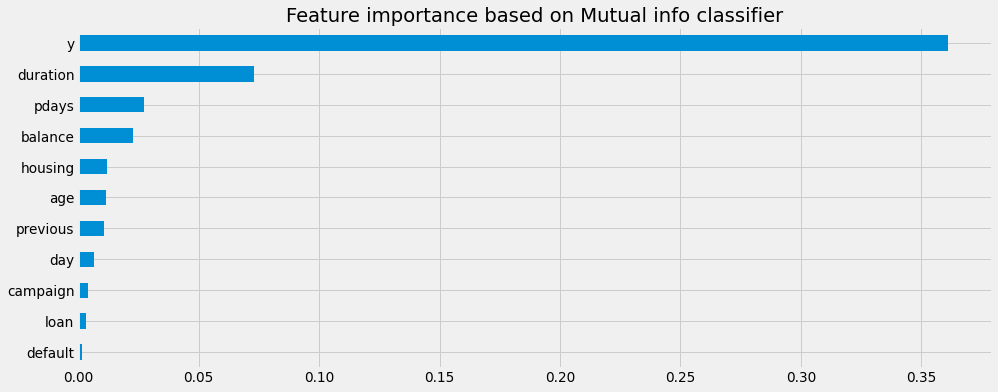

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# Select only numerical columns
x = bank_full.select_dtypes(include=['float64', 'int64'])
y = bank_full['y']

# Calculate mutual information
importance = mutual_info_classif(x, y)

# Create a pandas Series object with the feature importances
feat_importances = pd.Series(importance, x.columns)

# Plot the feature importances
feat_importances.sort_values().plot(kind='barh')
plt.title("Feature importance based on Mutual info classifier")
plt.show()


Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

###  Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
bank_full_1 = bank_full.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'previous']
bank_full_1[num_cols] = scaler.fit_transform(bank_full_1[num_cols])

bank_full_1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,contact_cellular,contact_telephone
0,1.606965,0,0.256419,1,0,-1.298476,may,261,-0.569351,-1,...,1,0,0,0,1,0,1,0,1,0
1,0.288529,0,-0.437895,1,0,-1.298476,may,151,-0.569351,-1,...,0,1,0,1,0,0,1,0,1,0
2,-0.747384,0,-0.446762,1,1,-1.298476,may,76,-0.569351,-1,...,1,0,0,1,0,0,1,0,1,0
3,0.571051,0,0.047205,1,0,-1.298476,may,92,-0.569351,-1,...,1,0,0,1,0,0,1,0,1,0
4,-0.747384,0,-0.447091,0,0,-1.298476,may,198,-0.569351,-1,...,0,1,0,1,0,0,1,0,1,0


 I scaled My numerical data using StandardScaler() function from sklearn we can scale each my columns that contains numerical data. The scaling is done using the formula below:

<div align="center">$Z = \frac{X - U}{S}$</div>

*Where:*

*$Z:$ scaled value*

*$X:$ original value*

*$U:$ mean of the data*

*$S:$ standard deviation of the data*

###  Data Splitting

In [ ]:
# Select Features
feature = bank_full_1.drop(['y','month'], axis=1)

# Select Target
target = bank_full_1['y']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (36168, 32)
Shape of testing feature: (9043, 32)
Shape of training label: (36168,)
Shape of training label: (9043,)


I can see i have 33435 data for training and 8359 testing which is a fair split to start with.& i use 0.20% test size

###  Handling Imbalanced Dataset

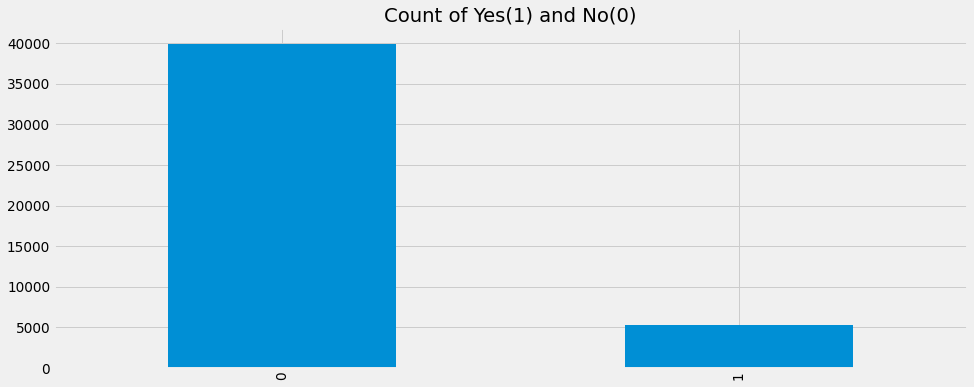

In [ ]:
# plotting bar plot to visualize th class imbalance
bank_full.y.value_counts().plot(kind="bar")
plt.title("Count of Yes(1) and No(0)")
plt.show()

In above picture we clearly see that our dataset is imbalnced. So i perfrom SMOT technuque

### SMOTE technuque

In [ ]:
# importing libraries for smote
from imblearn.over_sampling import SMOTE
from collections import Counter
# applying smote technique
sm_df = SMOTE(random_state=0)
X_res, y_res = sm_df.fit_resample(X_train, y_train)
# Preview synthetic sample class distribution
print('distribution of Synthetic sample class: \n')
print(pd.Series(y_res).value_counts()) 

distribution of Synthetic sample class: 

0    31929
1    31929
Name: y, dtype: int64


SMOT technique generates synthetic data for the minority class. Here we can see that our minority class is label 1. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors

## ***7. ML Model Implementation***

In the ML Model Impletentaion use This 6 metrics to evaluate models:

1. Accuracy: the proportion of true results among the total number of cases examined.
<div align='center'>$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$</div>
2. Precision: used to calculate how much proportion of all data that was predicted positive **was** actually positive.
<div align='center'>$Precision = \frac{TP}{TP+FP}$</div>
3. Recall: used to calculate how much proportion of actual positives is correctly classified.
<div align='center'>$Recall = \frac{TP}{TP+FN}$</div>
4. F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall.
<div align='center'>$F1 = \frac{2TP}{2TP+FP+FN}$</div>
5. Cohen Kappa Score: Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories.
<div align='center'>$\kappa = \frac{p_o-p_e}{1-p_e}$</div>
    where $p_o$ is the empirical probability of agreement on the label assigned to any sample (the observed agreement ratio), and $p_e$ is the expected agreement when both annotators assign labels randomly. $p_e$ is estimated using a per-annotator empirical prior over the class labels.
6. Area Under Curve (AUC): indicates how well the probabilities from the positive classes are separated from the negative classes

In [ ]:
# defining a function for model and defining the formulae for all the evaluation metrics used
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred_df = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc_df = metrics.accuracy_score(y_test, y_pred_df)
    prec_df = metrics.precision_score(y_test, y_pred_df)
    rec_df = metrics.recall_score(y_test, y_pred_df)
    f1_df = metrics.f1_score(y_test, y_pred_df)
    kappa_df = metrics.cohen_kappa_score(y_test, y_pred_df)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc_df = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred_df)

    return {'acc': acc_df, 'prec': prec_df, 'rec': rec_df, 'f1': f1_df, 'kappa': kappa_df, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc_df, 'cm': cm}

### **ML Model - 1  - LOGISTIC REGRESSION**

In [ ]:
# ML Model - 3 Implementation
from sklearn.linear_model import LogisticRegression

# Fit the Algorithm
clf_df = LogisticRegression(fit_intercept=True, max_iter=10000)
clf_df.fit(X_res, y_res)

# Predict on the model
# Evaluate Model
clf_eval_df = evaluate_model(clf_df, X_res, y_res)
# Print result
print('Accuracy:', clf_eval_df['acc'])
print('Precision:', clf_eval_df['prec'])
print('Recall:', clf_eval_df['rec'])
print('F1 Score:', clf_eval_df['f1'])
print('Cohens Kappa Score:', clf_eval_df['kappa'])
print('Area Under Curve:', clf_eval_df['auc'])
print('Confusion Matrix:\n', clf_eval_df['cm'])

Accuracy: 0.9271665257289611
Precision: 0.9647018739352641
Recall: 0.8867800432208963
F1 Score: 0.9241012418609963
Cohens Kappa Score: 0.8543330514579223
Area Under Curve: 0.979374726297167
Confusion Matrix:
 [[30893  1036]
 [ 3615 28314]]


In [ ]:
clf_df.coef_

array([[-4.98475597e-02, -6.10848211e-01,  3.53833503e-02,
        -1.22827671e+00, -8.29940933e-01, -5.89304417e-02,
         4.28353611e-03, -3.47998599e-01,  1.02301862e-03,
         4.10963442e-02, -5.27336478e+00, -5.62608500e+00,
        -6.07351927e+00, -5.94607615e+00, -5.27732085e+00,
        -4.86001697e+00, -6.08171527e+00, -5.73718166e+00,
        -4.59981003e+00, -5.52021087e+00, -5.86301368e+00,
        -5.58526509e+00, -5.44367995e+00, -5.28477599e+00,
        -5.24550849e+00, -4.88114025e+00, -4.60949963e+00,
        -3.18264662e+00, -3.25588005e+00, -8.96850179e-01,
        -3.23794371e+00, -3.32130218e+00]])

In [ ]:
clf_df.intercept_

array([19.43885661])

**ML Model used and it's performance using Evaluation metric Score Chart for Logistic Regression**

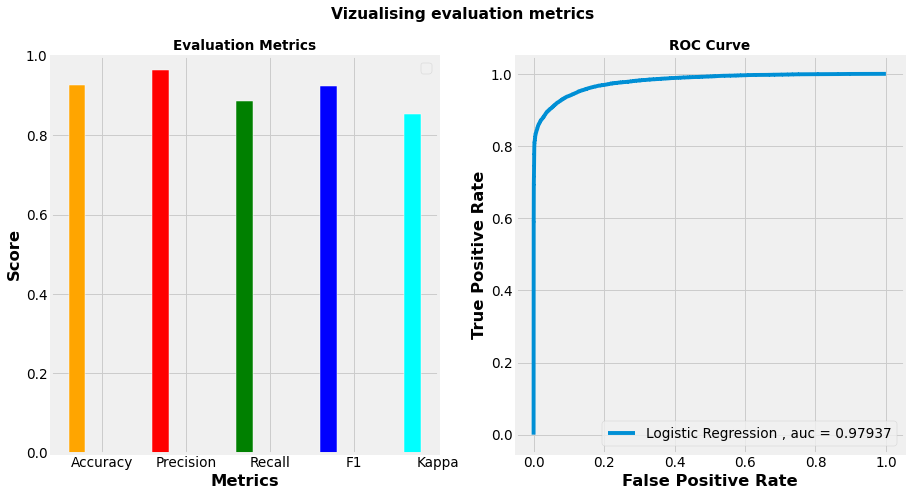

In [ ]:
# Visualizing evaluation Metric Score chart
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Vizualising evaluation metrics', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
barWidth = 0.2

clf_score = [clf_eval_df['acc'], clf_eval_df['prec'], clf_eval_df['rec'], clf_eval_df['f1'], clf_eval_df['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(clf_score))
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white',color=['orange', 'red', 'green', 'blue', 'cyan'])

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
ax2.plot(clf_eval_df['fpr'], clf_eval_df['tpr'], label='Logistic Regression , auc = {:0.5f}'.format(clf_eval_df['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

[Text(0, 0.5, 'TD Accepted'), Text(0, 1.5, 'TD Rejected')]

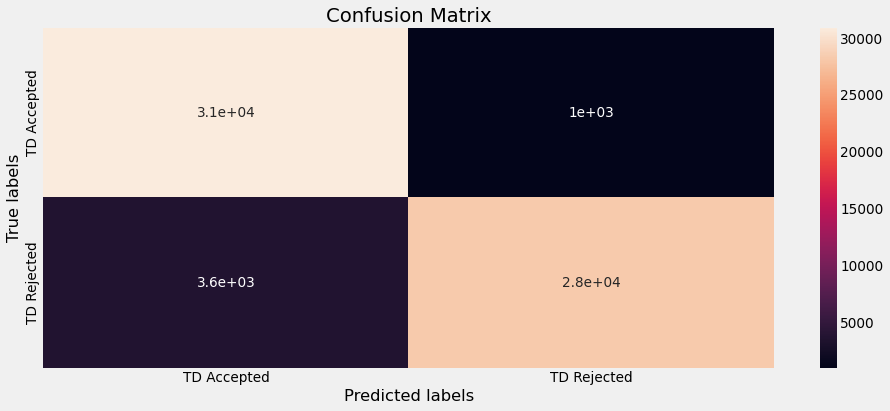

In [ ]:
# Get the confusion matrix for decision tree classifier for both actual and predicted values
labels = ['TD Accepted','TD Rejected']
ax= plt.subplot()
sns.heatmap(clf_eval_df['cm'], annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Perfroming  Cross- Validation & Hyperparameter Tuning On Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    # 'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(X_res , y_res)
# LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.799 total time=   0.2s
[CV 2/5] END C=0.001, penalty=l1, solve

In [ ]:
# Fit the Algorithm
clf = LogisticRegression(fit_intercept=True, max_iter=10000 , C = 0.1, penalty = 'l1', solver = 'saga')
clf.fit(X_res, y_res)

# Predict on the model
# Evaluate Model
clf_eval = evaluate_model(clf, X_res, y_res)
# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

Accuracy: 0.8588743775251338
Precision: 0.8838050577792664
Recall: 0.8263960662720411
F1 Score: 0.8541369933963485
Cohens Kappa Score: 0.7177487550502678
Area Under Curve: 0.9362567284216603
Confusion Matrix:
 [[28460  3469]
 [ 5543 26386]]


I have used Grid Search CV Hyperparameter optimization technique and tried to find the best max depth value to optimize our model. Also used Cross validation with CV = 5

### **ML Model - 2 : Decision Tree**

In [ ]:
# import tree
from sklearn import tree

# Building Decision Tree model 
dtc_df = tree.DecisionTreeClassifier(random_state=0)
dtc_df.fit(X_res, y_res)
# Evaluate Model
dtc_eval_df = evaluate_model(dtc_df, X_test, y_test)
# Print result
print('Accuracy:', dtc_eval_df['acc'])
print('Precision:', dtc_eval_df['prec'])
print('Recall:', dtc_eval_df['rec'])
print('F1 Score:', dtc_eval_df['f1'])
print('Cohens Kappa Score:', dtc_eval_df['kappa'])
print('Area Under Curve:', dtc_eval_df['auc'])
print('Confusion Matrix:\n', dtc_eval_df['cm'])

Accuracy: 0.8529249142983523
Precision: 0.38235294117647056
Recall: 0.43333333333333335
F1 Score: 0.40625
Cohens Kappa Score: 0.3226911493401031
Area Under Curve: 0.6706889361524667
Confusion Matrix:
 [[7258  735]
 [ 595  455]]


**ML Model used and it's performance using Evaluation metric Score Chart for Decision tree**

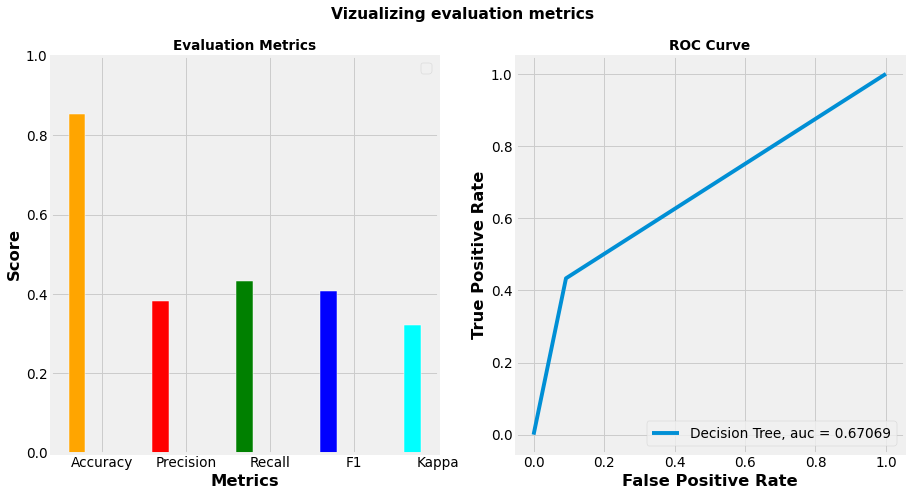

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Vizualizing evaluation metrics', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
barWidth = 0.2

# First plot
dtc_score = [dtc_eval_df['acc'], dtc_eval_df['prec'], dtc_eval_df['rec'], dtc_eval_df['f1'], dtc_eval_df['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white',color=['orange', 'red', 'green', 'blue', 'cyan'])

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
ax2.plot(dtc_eval_df['fpr'], dtc_eval_df['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval_df['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

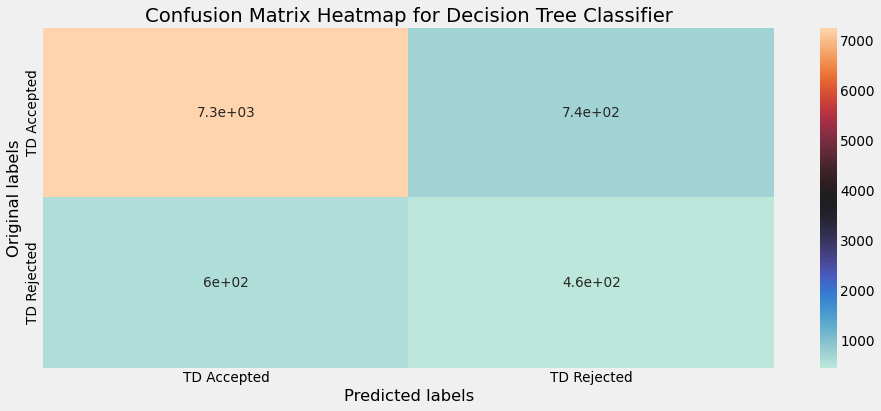

In [ ]:
# Get the confusion matrix for both train and test
labels = ['TD Accepted','TD Rejected']
ax= plt.subplot()
sns.heatmap(dtc_eval_df['cm'], annot=True, ax = ax,cmap='icefire')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Original labels')
ax.set_title('Confusion Matrix Heatmap for Decision Tree Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

After creating visualization of this model i found that model accuracy is good (85%), but recall, precision, and other metrics are poor. So this model is not a good fit.

**Perfroming  Cross- Validation & Hyperparameter Tuning On Decision Tree**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid_df = {'max_depth': [25,26,27,28,29,30,31,32,35,37,40,50, 80, 100]}

# Create a base model
dtc_grid_df = tree.DecisionTreeClassifier(random_state=0)


# Initiate the grid search model
grid_search_df = GridSearchCV(estimator=dtc_grid_df, param_grid=param_grid_df, scoring='roc_auc',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_df.fit(X_res, y_res)

grid_search_df.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


{'max_depth': 25}

In [ ]:
# import tree
from sklearn import tree

# Building Decision Tree model 
dtc_df = tree.DecisionTreeClassifier(random_state=0,max_depth=25)
dtc_df.fit(X_res, y_res)
# Evaluate Model
dtc_eval_df = evaluate_model(dtc_df, X_test, y_test)
# Print result
print('Accuracy:', dtc_eval_df['acc'])
print('Precision:', dtc_eval_df['prec'])
print('Recall:', dtc_eval_df['rec'])
print('F1 Score:', dtc_eval_df['f1'])
print('Cohens Kappa Score:', dtc_eval_df['kappa'])
print('Area Under Curve:', dtc_eval_df['auc'])
print('Confusion Matrix:\n', dtc_eval_df['cm'])

Accuracy: 0.8521508348999226
Precision: 0.38189300411522636
Recall: 0.4419047619047619
F1 Score: 0.4097130242825608
Cohens Kappa Score: 0.32571737216686614
Area Under Curve: 0.6745270564124561
Confusion Matrix:
 [[7242  751]
 [ 586  464]]


I have used Grid Search CV Hyperparameter optimization technique and tried to find the best max depth value to optimize our model. Also used Cross validation with CV = 5

### **ML Model - 3 : Random Forest**

In [ ]:
# importing library for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf_df = RandomForestClassifier(random_state=0)
rf_df.fit(X_res, y_res)

RandomForestClassifier(random_state=0)

In [ ]:
# Evaluate Model
rf_eval_df = evaluate_model(rf_df, X_test, y_test)

# Print result
print('Accuracy:', rf_eval_df['acc'])
print('Precision:', rf_eval_df['prec'])
print('Recall:', rf_eval_df['rec'])
print('F1 Score:', rf_eval_df['f1'])
print('Cohens Kappa Score:', rf_eval_df['kappa'])
print('Area Under Curve:', rf_eval_df['auc'])
print('Confusion Matrix:\n', rf_eval_df['cm'])

Accuracy: 0.8933982085591065
Precision: 0.5533498759305211
Recall: 0.4247619047619048
F1 Score: 0.48060344827586204
Cohens Kappa Score: 0.42234895973867703
Area Under Curve: 0.8852814665213015
Confusion Matrix:
 [[7633  360]
 [ 604  446]]


**ML Model used and it's performance using Evaluation metric Score Chart for Random Forest**

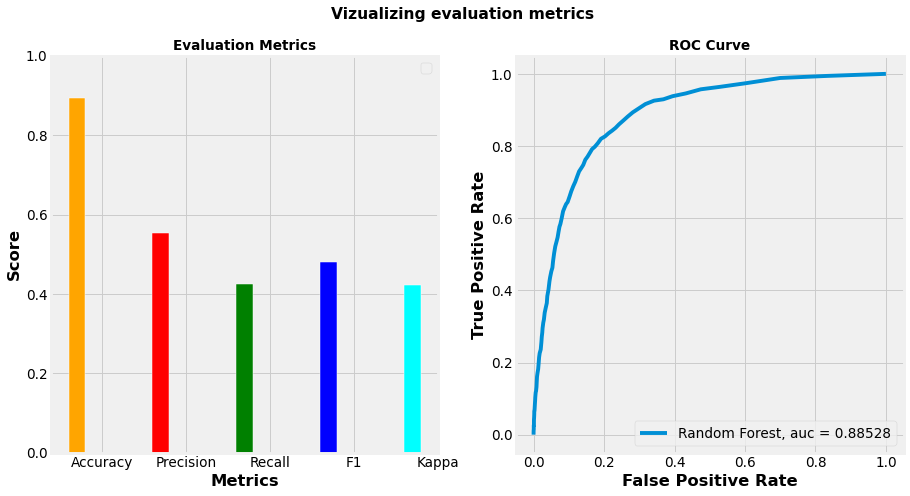

In [ ]:
# Visualizing evaluation Metric Score chart

# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Vizualizing evaluation metrics', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
barWidth = 0.2

# First plot
rf_score = [rf_eval_df['acc'], rf_eval_df['prec'], rf_eval_df['rec'], rf_eval_df['f1'], rf_eval_df['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white',color=['orange', 'red', 'green', 'blue', 'cyan'])

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
ax2.plot(rf_eval_df['fpr'], rf_eval_df['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval_df['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

**Cross- Validation & Hyperparameter Tuning On Random Forest**

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid_df = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

# Create a base model
rf_grids_df = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search_df = GridSearchCV(estimator=rf_grids_df, param_grid=param_grid_df, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_df.fit(X_train, y_train)

grid_search_df.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


{'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
# Building Random Forest model with tuned parameter
rf_tuned_df = RandomForestClassifier(random_state=0, max_depth = 50, max_features=4, min_samples_leaf = 5, min_samples_split = 8, n_estimators = 300)
rf_tuned_df.fit(X_res, y_res)

RandomForestClassifier(max_depth=50, max_features=4, min_samples_leaf=5,
                       min_samples_split=8, n_estimators=300, random_state=0)

In [ ]:
# Evaluate Model
rf_eval_df= evaluate_model(rf_tuned_df, X_test, y_test)

# Print result
print('Accuracy:', rf_eval_df['acc'])
print('Precision:', rf_eval_df['prec'])
print('Recall:', rf_eval_df['rec'])
print('F1 Score:', rf_eval_df['f1'])
print('Cohens Kappa Score:', rf_eval_df['kappa'])
print('Area Under Curve:', rf_eval_df['auc'])
print('Confusion Matrix:\n', rf_eval_df['cm'])

Accuracy: 0.892734711931881
Precision: 0.5413223140495868
Recall: 0.4990476190476191
F1 Score: 0.5193260654112983
Cohens Kappa Score: 0.4590698036393004
Area Under Curve: 0.8920144412074852
Confusion Matrix:
 [[7549  444]
 [ 526  524]]


### **Model Comparision**

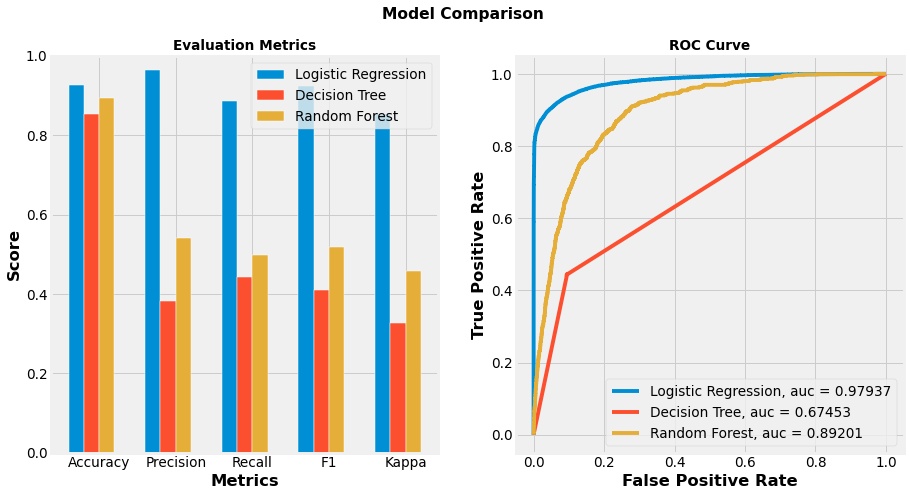

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
clf_score_df = [clf_eval_df['acc'], clf_eval_df['prec'], clf_eval_df['rec'], clf_eval_df['f1'], clf_eval_df['kappa']]
dtc_score_df = [dtc_eval_df['acc'], dtc_eval_df['prec'], dtc_eval_df['rec'], dtc_eval_df['f1'], dtc_eval_df['kappa']]
rf_score_df = [rf_eval_df['acc'], rf_eval_df['prec'], rf_eval_df['rec'], rf_eval_df['f1'], rf_eval_df['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#r4 = [x + barWidth for x in r3]
#r5 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, clf_score_df, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, dtc_score_df, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, rf_score_df, width=barWidth, edgecolor='white', label='Random Forest')




## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval_df['fpr'], clf_eval_df['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(clf_eval_df['auc']))
ax2.plot(dtc_eval_df['fpr'], dtc_eval_df['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval_df['auc']))
ax2.plot(rf_eval_df['fpr'], rf_eval_df['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval_df['auc']))



## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

We can see that logistic regression has the highest performance of the three that we have used till now. It not only performs well in terms of accuracy but also in terms of precision and recall. It has the highest true positives and recall value which indicates that very less number of clints who have shown interest in the term deposit has been predicted inaccurately in our model. Good precision value indicates that our model is bang on in predicting the true positives out of total predicted positives. Since both precision and recall value has better result the f1 score which is the combition of two has also a better number. Better outcomes of true positives will lead to better area under the curve which is evident from the AUC-ROC plot.

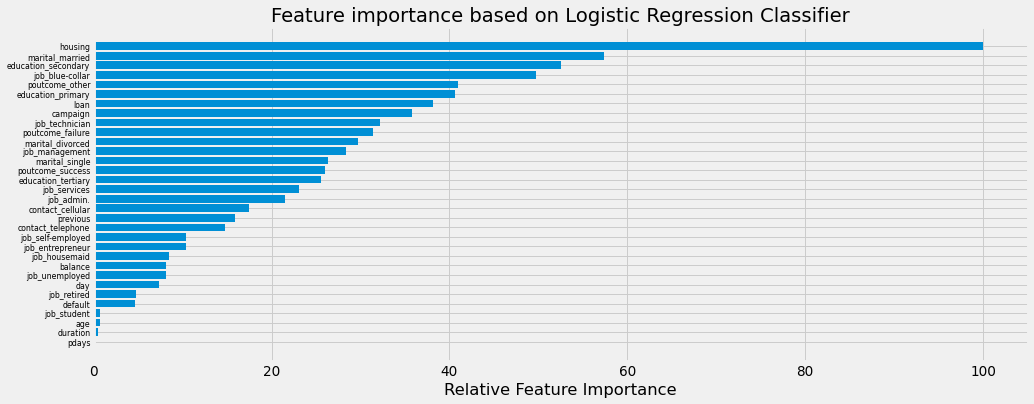

In [ ]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_res.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.title("Feature importance based on Logistic Regression Classifier")

plt.tight_layout()   
plt.show()

I have used Logistic Regression as the best model and Coefficient values as the model explainibility tool for the feature importance



## ***7. Conclusion***

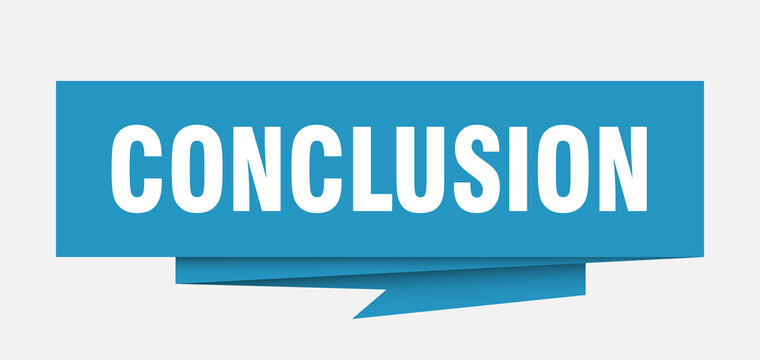

### Model Conclusion

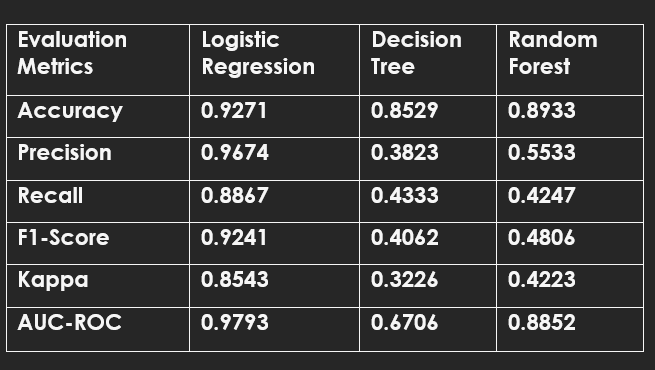

Based on My analysis and model training we can say that logistic regression performs better than other Two Algorithmns.



We have used Logistic Regression as the best model and Coefficient values as the model explainibility tool for the feature importance

### EDA Conclusion For Business Recommandation

 * It can be recommended that the company target 
clients under the age of 40 with less than a $5,000 bank balance by increasing the frequency of phone calls to secure their acceptance of Term Deposit.

* Clients who have completed their secondary education and have blue collar employment followed by management and technicians can be the target client, and because they belong to a middle-class sector of society, the company can provide them with reasonable interest rates to acquire additional term deposits.

* We discovered that the majority of single or divorced consumers did not choose for term deposits. It generates a sizable number of consumers that the bank can capture by offering attractive plans to this specific demographic.

* Strategies should be developed to generate clients from the unemployed, self-employed, and housemaids segments, as they have the lowest conversion rate

### Challenges faced


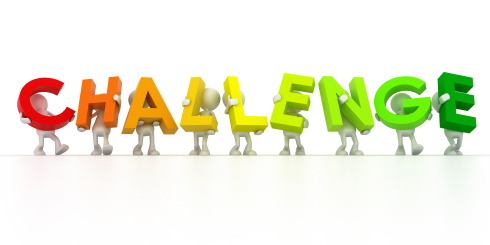

1. Reading the dataset and understanding of Rows & columns.
2. Removing outliers.
3. Choosing the right ML models and evaluation metrics.

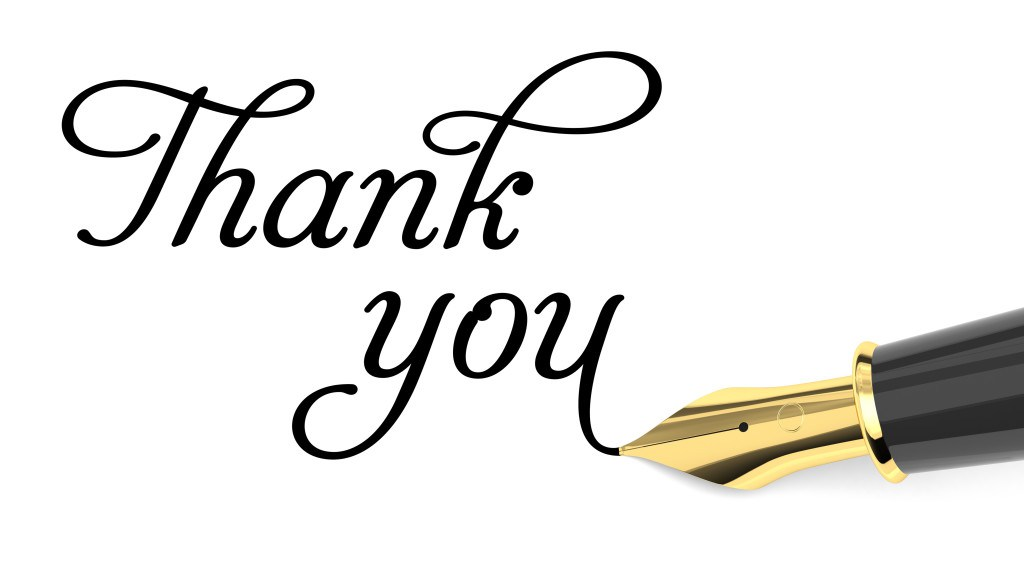